In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv('/content/datathon.csv')

In [ ]:
dataset

,TIMEINT,date,LINK_ID,DAY,VEHS(ALL)_1,SPEEDAVGARITH(ALL)_1,SPEEDAVGHARM(ALL)_1,QUEUEDELAY(ALL)_1,OCCUPRATE(ALL)_1,VEHS(ALL)_2,...,VEHS(ALL)_5,SPEEDAVGARITH(ALL)_5,SPEEDAVGHARM(ALL)_5,QUEUEDELAY(ALL)_5,OCCUPRATE(ALL)_5,VEHS(ALL)_6,SPEEDAVGARITH(ALL)_6,SPEEDAVGHARM(ALL)_6,QUEUEDELAY(ALL)_6,OCCUPRATE(ALL)_6
0,900-1200,01-07-2024 00:00,1,1,228,146.24,136.25,247.13,0.3064,196,...,198,155.52,134.94,179.73,0.7288,3,15.91,8.64,95.40,0.2005
1,1200-1500,01-07-2024 00:05,1,1,223,159.91,152.15,229.73,0.2840,215,...,198,170.08,148.28,200.49,0.3336,2,17.71,13.93,13.05,0.0991
2,1500-1800,01-07-2024 00:10,1,1,218,153.16,143.45,245.56,0.2909,205,...,187,156.51,139.76,254.97,0.2590,7,22.75,17.16,62.96,0.5037
3,1800-2100,01-07-2024 00:15,1,1,210,146.01,136.60,134.90,0.2512,181,...,173,163.14,145.79,247.34,0.3618,6,18.42,17.01,77.25,0.3064
4,2100-2400,01-07-2024 00:20,1,1,230,154.16,146.49,230.71,0.2843,193,...,197,152.93,133.32,247.62,0.5600,5,19.04,15.82,58.94,0.4467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266107,1209000-1209300,14-07-2024 23:35,66,14,184,193.87,179.04,156.34,0.2074,175,...,73,42.38,36.85,6.62,0.1027,0,0.00,0.00,0.00,0.0000
266108,1209300-1209600,14-07-2024 23:40,66,14,176,194.59,182.20,178.22,0.2011,169,...,73,42.76,37.63,6.82,0.1010,0,0.00,0.00,0.00,0.0000
266109,1209600-1209900,14-07-2024 23:45,66,14,182,194.66,188.04,115.79,0.1935,182,...,72,43.32,38.37,2.31,0.0992,0,0.00,0.00,0.00,0.0000
266110,1209900-1210200,14-07-2024 23:50,66,14,171,195.68,184.64,175.16,0.2127,170,...,70,43.41,37.78,5.81,0.1147,0,0.00,0.00,0.00,0.0000


In [ ]:
dataset['VEHS(ALL)_1']

,VEHS(ALL)_1
0,228
1,223
2,218
3,210
4,230
...,...
266107,184
266108,176
266109,182
266110,171


In [ ]:
dataset['VEHS(ALL)_2']

,VEHS(ALL)_2
0,196
1,215
2,205
3,181
4,193
...,...
266107,175
266108,169
266109,182
266110,170


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load dataset
df = pd.read_csv("/content/datathon.csv")

In [ ]:
X = df[["VEHS(ALL)_1", "SPEEDAVGARITH(ALL)_1", "QUEUEDELAY(ALL)_1"]]
y = df["OCCUPRATE(ALL)_1"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 0.014388617551845662
R-squared Score: 0.6336633650985881


In [ ]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [ 1.44711076e-03 -2.47835202e-04  9.60413019e-05]
Intercept: 0.028230579383290183


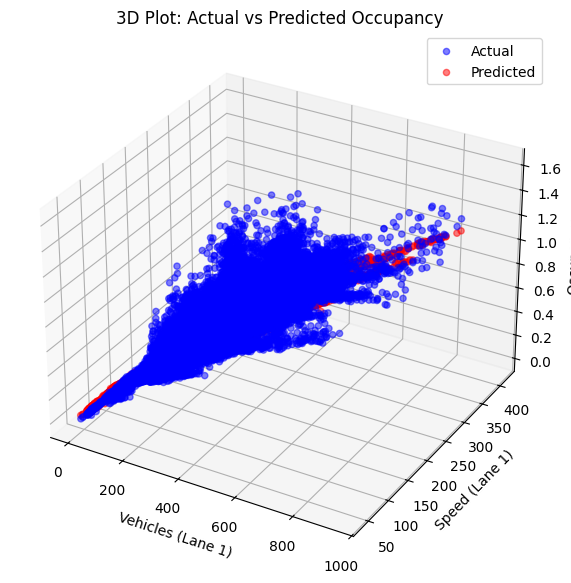

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test["VEHS(ALL)_1"], X_test["SPEEDAVGARITH(ALL)_1"], y_test, color='blue', alpha=0.5, label='Actual')
ax.scatter(X_test["VEHS(ALL)_1"], X_test["SPEEDAVGARITH(ALL)_1"], y_pred, color='red', alpha=0.5, label='Predicted')
ax.set_xlabel("Vehicles (Lane 1)")
ax.set_ylabel("Speed (Lane 1)")
ax.set_zlabel("Occupancy")
ax.set_title("3D Plot: Actual vs Predicted Occupancy")
ax.legend()
plt.show()
